# Machine Learning Lab 4 :- Logistic Regression
<hr/>

**Submitted by:-** <br>

Name: **Naveen N S** <br>
Register Number: **20112045** <br>
Class: **4BSCDS** <br> 
<hr/>

# Lab Overview
-----------------------
- Applying Logistic regression to iris dataset
- Demonstrating logistic regression to other dataset
- Demonstratinh the Logistic Regression for other dataset with different penalties - none, l1, l2, elastic net
- Checking what happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000
- Geting the following attributes: classes_, coef_ and intercept_ and print the same in the above case.

# Problem Definition
-----------------------

## Apply Logistic Regression for IRIS Dataset

# Problem Approach
-------------------------------

- importing necessary libraries
- importing dataset
- import logistic_regression model from sklearn library
- getting feature data and target data
- splitting the data into training and testing set
- model fitting and prediction
- evaluating the model using accuracy_score and confusion matrix

In [116]:
# importing required libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sympy import Matrix

import seaborn as sns
import matplotlib.pyplot as plt

In [117]:
# importing iris dataset from csv file

iris_ds = pd.read_csv("iris.csv")
iris_ds

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## EDA on Iris Dataset
---------------------------

**Numerical feedback about the dataset**

In [118]:
iris_ds.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [119]:
iris_ds.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [120]:
#correlation
iris_ds.corr(method='pearson')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


**Visualization**

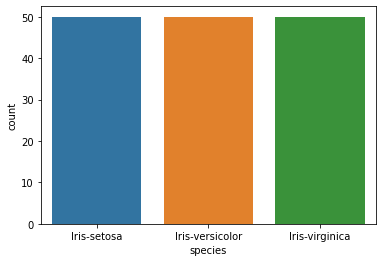

In [121]:
#countplot
sns.countplot(x='species', data=iris_ds)
plt.show()

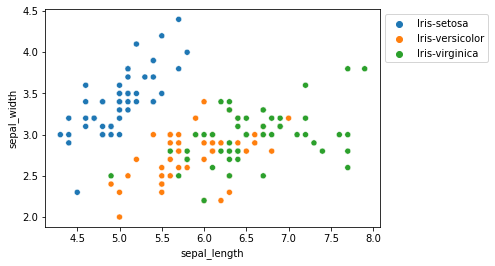

In [122]:
#scatterplot
sns.scatterplot(x='sepal_length', y='sepal_width',hue='species', data=iris_ds)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

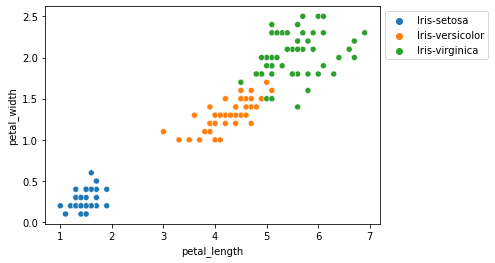

In [123]:
sns.scatterplot(x='petal_length', y='petal_width',hue='species', data=iris_ds)
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()

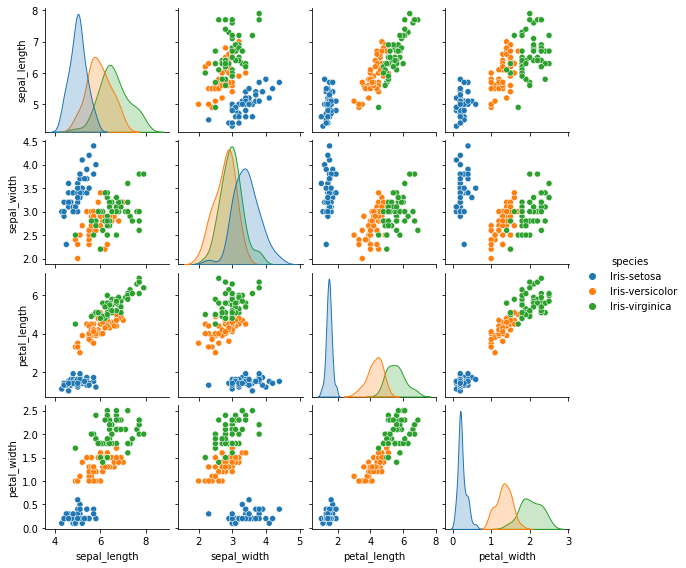

In [124]:
sns.pairplot(iris_ds, hue='species', height=2);

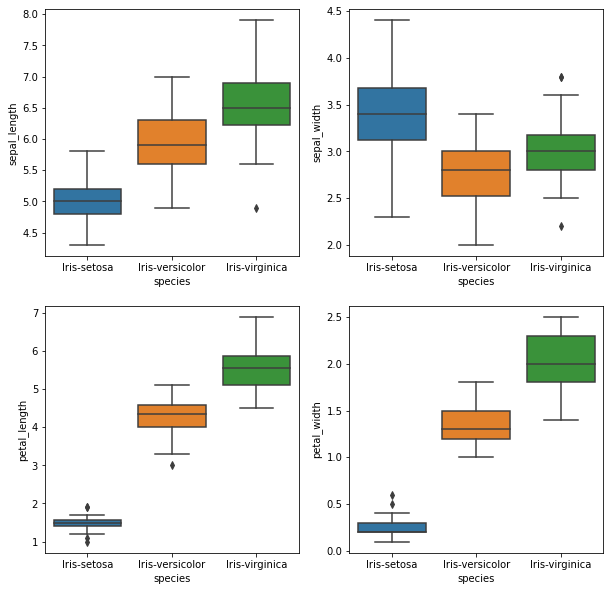

In [125]:
def graph(y):
    sns.boxplot(x="species", y=y, data=iris_ds)

plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('sepal_length')
  
plt.subplot(222)
graph('sepal_width')
  
plt.subplot(223)
graph('petal_length')
  
plt.subplot(224)
graph('petal_width')
  
plt.show()

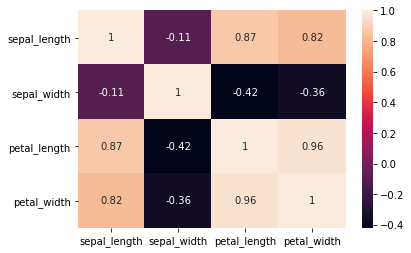

In [126]:
#heatmap
sns.heatmap(iris_ds.corr(method='pearson'), annot = True);
  
plt.show()

## Performing Logistic Regression on Iris Dataset
-------

In [127]:
from sklearn.linear_model import LogisticRegression

In [128]:
logisticRegressor = LogisticRegression()

In [129]:
logisticRegressor

LogisticRegression()

#### Splitting data into training and testing set

In [130]:
# getting features

X = iris_ds.drop(['species'],axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [131]:
# getting the target

y = iris_ds["species"]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [132]:
# splitting the original dataset in the ratio of 70:30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [133]:
#fitting the model 
logisticRegressor.fit(X_train,y_train)

LogisticRegression()

In [134]:
# predicting the values

y_pred = logisticRegressor.predict(X_test)
y_pred

array(['Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica'], dtype=object)

#### Evaluating the model

In [135]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.9333333333333333


In [136]:
mat = confusion_matrix(y_test,y_pred)
matt = Matrix(mat)

print("Confusion Matrix:")
matt

Confusion Matrix:


Matrix([
[12,  0,  0],
[ 0, 12,  1],
[ 0,  2, 18]])

# Problem Definition
-------------------------
## 1] Demonstrate the Logistic Regression for any other dataset with different penalties - none, l1, l2

# Problem Approach
------------------------------------
- importing warnings to ignore warnings
- splitting dataset into training and testing test with 95% test set and 5% train set
- creating an array containing required penalties
- running a loop for performing logistic regression with different penaltie and printing accuracy_score for each penalty


In [137]:
"""
Did not use ElasticNet as one of the penalty

"""


# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# taking very less training set in order to intentionally decrease accuracy
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.95)

# penalties required 
penalties = ["l1","l2","none"]

# running a loop to predict using different penalties
for penalty in penalties:
    print("With Penalty as : {}".format(penalty))
    model = LogisticRegression(penalty=penalty,solver="saga")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score",accuracy_score(y_test,y_pred))
    print("-"*50)

With Penalty as : l1
Accuracy Score 0.6503496503496503
--------------------------------------------------
With Penalty as : l2
Accuracy Score 0.6643356643356644
--------------------------------------------------
With Penalty as : none
Accuracy Score 0.6923076923076923
--------------------------------------------------


## 2] What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000
---------------------------

## Problem Approach
--------------------

- create an array containing required Max_iteration values
- run a for loop to perform prediction with each value of the above created array
- print accuracy score and penalty used for each case

In [138]:
iterr =[1,2,5,10,20,50,100,500,1000]

for i in range(0,len(iterr)):
    print("-"*50)
    print("When Max_iter = {}".format(iterr[i]))
    print("-"*50)
    c=0
    for penalty in penalties:
            print("When Penalty is {}".format(penalty))
            model= LogisticRegression(solver="saga", max_iter=iterr[c])
            c+=1
            model.fit(X_train,y_train)
            y_pred=model.predict(X_test)
            print("Accuracy Score: ",accuracy_score(y_test, y_pred))
            print()

--------------------------------------------------
When Max_iter = 1
--------------------------------------------------
When Penalty is l1
Accuracy Score:  0.3356643356643357

When Penalty is l2
Accuracy Score:  0.32167832167832167

When Penalty is none
Accuracy Score:  0.5454545454545454

--------------------------------------------------
When Max_iter = 2
--------------------------------------------------
When Penalty is l1
Accuracy Score:  0.32167832167832167

When Penalty is l2
Accuracy Score:  0.32167832167832167

When Penalty is none
Accuracy Score:  0.5734265734265734

--------------------------------------------------
When Max_iter = 5
--------------------------------------------------
When Penalty is l1
Accuracy Score:  0.32167832167832167

When Penalty is l2
Accuracy Score:  0.32167832167832167

When Penalty is none
Accuracy Score:  0.3356643356643357

--------------------------------------------------
When Max_iter = 10
--------------------------------------------------
When

# Problem Definition
-------------------------------------------

## 3] Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.
--------------------

## Problem Approach
----------------------------
- use in-built functions of the logisticRegression to find classes_ , coef_ and intercept_

In [139]:
print("The Iris model classes: ",logisticRegressor.classes_)
print("-"*70)
print("The Iris model coefficient: ",logisticRegressor.coef_)
print("-"*70)
print("The Iris model intercept: ",logisticRegressor.intercept_)

The Iris model classes:  ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
----------------------------------------------------------------------
The Iris model coefficient:  [[-0.36857507  0.92731576 -2.3222348  -0.9936292 ]
 [ 0.57031422 -0.34094538 -0.31031933 -0.47607893]
 [-0.20173915 -0.58637039  2.63255412  1.46970812]]
----------------------------------------------------------------------
The Iris model intercept:  [  8.79231228   1.75083022 -10.5431425 ]



# Demonstrate the Logistic Regression Algorithm for any other dataset.
-------------------

**HERE PERFROMED FOR HR EMPLOYEE ATTRITION DATASET ACCESSED FROM KAGGLE**

In [140]:
data = pd.read_csv("HR_Employee_Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


# EDA on HR Dataset
----------------------------------------------

**Numerical Feedback about the dataset**

In [141]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [142]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [150]:
numeric_columns = list(data.select_dtypes(include=np.number).columns)
categorical_columns = list(data.select_dtypes(include="object").columns)

In [144]:
data[categorical_columns].describe()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [145]:
data[numeric_columns].describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [146]:
#dropping some unnecessary columns
data = data.drop(["EmployeeCount","StandardHours","EmployeeCount"],axis=1)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,2061,3,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,2062,4,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2064,2,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,2065,4,...,3,4,0,17,3,2,9,6,0,8


In [148]:
#summary of numerical variables
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [151]:
#correlation
data[numeric_columns].corr(method='pearson')

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,...,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.046247,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656


**Visualisation**

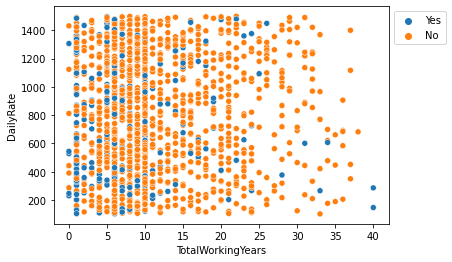

In [152]:
#scatterplot
sns.scatterplot(x='TotalWorkingYears', y='DailyRate',hue='Attrition', data=data)

# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)

plt.show()

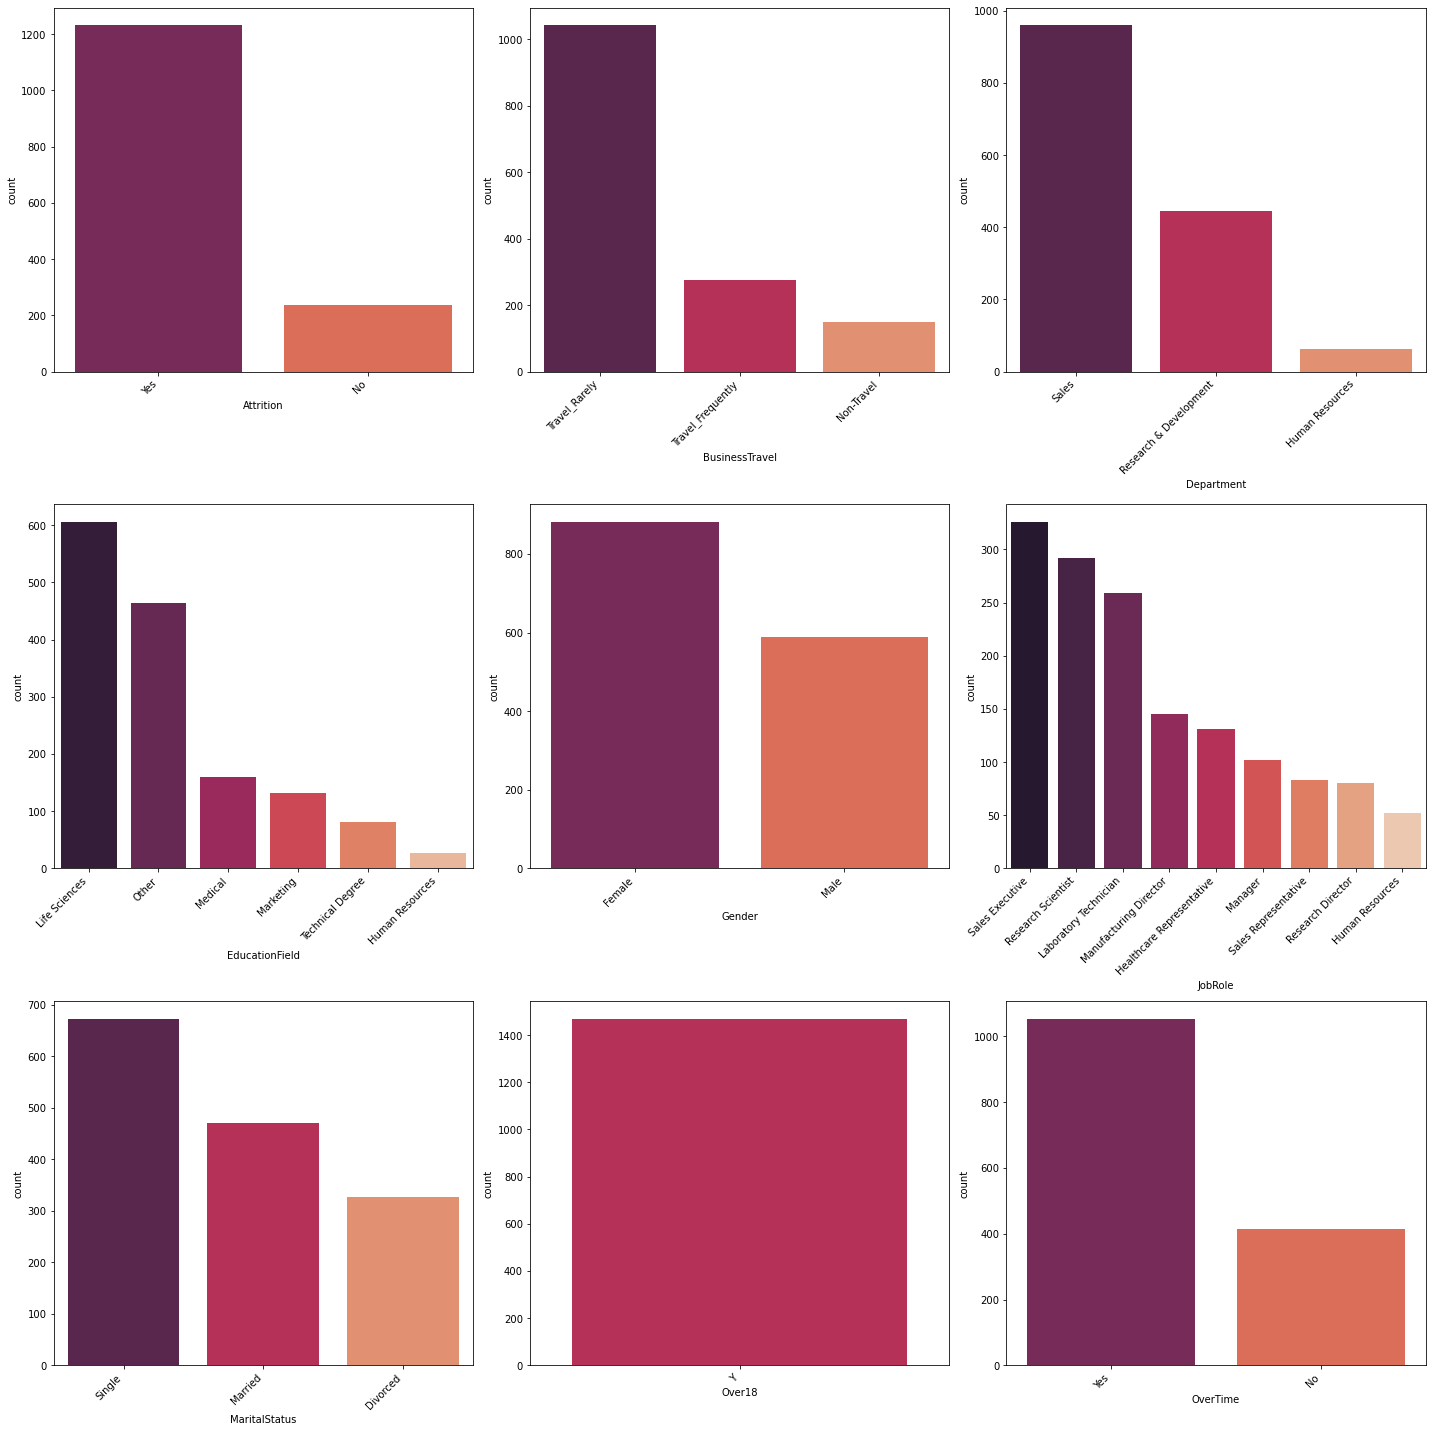

In [153]:
#countplotb
fig, ax = plt.subplots(3,3, figsize = (20,20))

ax = np.ravel(ax)
for i in range(len(categorical_columns)):
    sns.countplot(data = data, x = categorical_columns[i], ax = ax[i],
                  palette="rocket", order = data[categorical_columns[i]].value_counts().index)
    ax[i].set_xticklabels(labels = data[categorical_columns[i]].unique(), rotation=45, ha='right')
ax = np.reshape(ax, (3, 3))
plt.tight_layout()

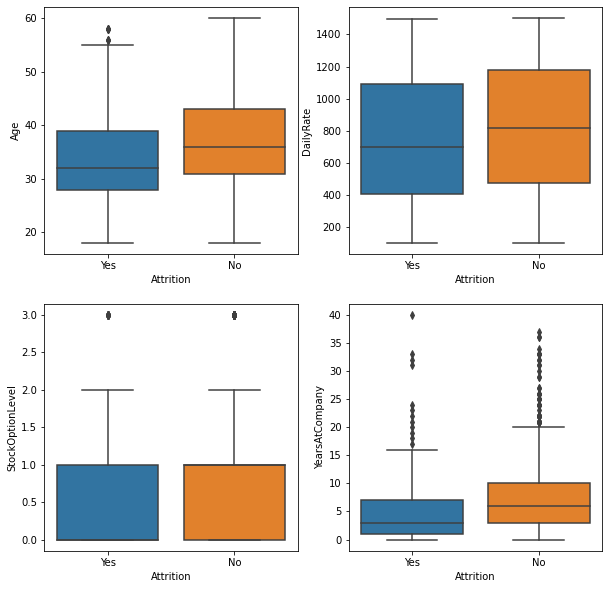

In [154]:
#boxplot
def graph(y):
    sns.boxplot(x="Attrition", y=y, data=data)

plt.figure(figsize=(10,10))
      
# Adding the subplot at the specified
# grid position
plt.subplot(221)
graph('Age')
  
plt.subplot(222)
graph('DailyRate')
  
plt.subplot(223)
graph('StockOptionLevel')
  
plt.subplot(224)
graph('YearsAtCompany')
  
plt.show()

In [ ]:
sns.pairplot(data[numeric_columns], hue='Attrition', height=2);

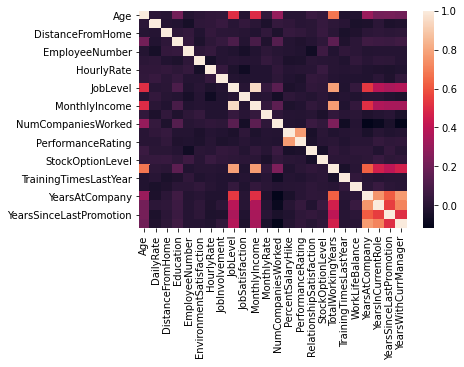

In [156]:
#heatmap
sns.heatmap(data.corr(method='pearson'));
  
plt.show()

## Performing Logistic Regression on HR dataset
--------------------

**ENCODING CATEGORICAL VARIABLES**

In [157]:
# Importing LabelEncoder from Sklearn
# library from preprocessing Module.
from sklearn.preprocessing import LabelEncoder

# Creating a instance of label Encoder.
le = LabelEncoder()

cat_var = ["Department","EducationField","Gender","BusinessTravel","JobRole","MaritalStatus","Over18",
          "OverTime"]

for var in cat_var:
    # Using .fit_transform function to fit label
    # encoder and return encoded label
    label = le.fit_transform(data[var])

    # removing the column 'Purchased' from df
    # as it is of no use now.
    data.drop(var, axis=1, inplace=True)

    # Appending the array to our dataFrame
    # with column name 'Purchased'
    data[var] = label

data

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus,Over18,OverTime
0,41,Yes,1102,1,2,1,2,94,3,2,...,0,5,2,1,0,2,7,2,0,1
1,49,No,279,8,1,2,3,61,2,2,...,1,7,1,1,1,1,6,1,0,0
2,37,Yes,1373,2,2,4,4,92,2,1,...,0,0,1,4,1,2,2,2,0,1
3,33,No,1392,3,4,5,4,56,3,1,...,3,0,1,1,0,1,6,1,0,1
4,27,No,591,2,1,7,1,40,3,1,...,2,2,1,3,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,884,23,2,2061,3,41,4,2,...,0,3,1,3,1,1,2,1,0,0
1466,39,No,613,6,1,2062,4,42,2,3,...,1,7,1,3,1,2,0,1,0,0
1467,27,No,155,4,3,2064,2,87,4,2,...,0,3,1,1,1,2,4,1,0,1
1468,49,No,1023,2,3,2065,4,63,2,2,...,0,8,2,3,1,1,7,1,0,0


In [158]:
# getting feature dataset
X = data.drop(["Attrition"],axis=1)
X

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,YearsSinceLastPromotion,YearsWithCurrManager,Department,EducationField,Gender,BusinessTravel,JobRole,MaritalStatus,Over18,OverTime
0,41,1102,1,2,1,2,94,3,2,4,...,0,5,2,1,0,2,7,2,0,1
1,49,279,8,1,2,3,61,2,2,2,...,1,7,1,1,1,1,6,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,0,0,1,4,1,2,2,2,0,1
3,33,1392,3,4,5,4,56,3,1,3,...,3,0,1,1,0,1,6,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,2,2,1,3,1,2,2,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,2061,3,41,4,2,4,...,0,3,1,3,1,1,2,1,0,0
1466,39,613,6,1,2062,4,42,2,3,1,...,1,7,1,3,1,2,0,1,0,0
1467,27,155,4,3,2064,2,87,4,2,2,...,0,3,1,1,1,2,4,1,0,1
1468,49,1023,2,3,2065,4,63,2,2,2,...,0,8,2,3,1,1,7,1,0,0


In [159]:
# getting target dataset
y = data["Attrition"]
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [160]:
# splitting the original dataset in the ratio of 70:30

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

In [161]:
# fitting the dataset
logisticRegressor.fit(X_train,y_train)

LogisticRegression()

In [162]:
# predicting the values

y_pred = logisticRegressor.predict(X_test)
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'N

**EVALUATION METRICS**

In [163]:
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

Accuracy Score:  0.8367346938775511


In [164]:
mat = confusion_matrix(y_test,y_pred)
matt = Matrix(mat)

print("Confusion Matrix:")
matt

Confusion Matrix:


Matrix([
[368, 2],
[ 70, 1]])

# Problem Definition
-------------------------
## 1] Demonstrate the Logistic Regression for any other dataset with different penalties - none, l1, l2

In [165]:
"""
Did not use ElasticNet as one of the penalty

"""


# to ignore warnings
import warnings
warnings.filterwarnings("ignore")

# taking very less training set in order to intentionally decrease accuracy
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.95)

# penalties required 
penalties = ["l1","l2","none"]

# running a loop to predict using different penalties
for penalty in penalties:
    print("With Penalty as : {}".format(penalty))
    model = LogisticRegression(penalty=penalty,solver="saga")
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print("Accuracy Score",accuracy_score(y_test,y_pred))
    print("-"*50)

With Penalty as : l1
Accuracy Score 0.8367931281317108
--------------------------------------------------
With Penalty as : l2
Accuracy Score 0.8367931281317108
--------------------------------------------------
With Penalty as : none
Accuracy Score 0.8367931281317108
--------------------------------------------------


## 2] What happens when the Maximum Iterations are kept as 1, 2, 5, 10, 20, 50, 100, 500 and 1000
---------------------------

In [166]:
iterr =[1,2,5,10,20,50,100,500,1000]

for i in range(0,len(iterr)):
    print("-"*50)
    print("When Max_iter = {}".format(iterr[i]))
    print("-"*50)
    c=0
    for penalty in penalties:
            print("When Penalty is {}".format(penalty))
            model= LogisticRegression(solver="saga", max_iter=iterr[c])
            c+=1
            model.fit(X_train,y_train)
            y_pred=model.predict(X_test)
            print("Accuracy Score: ",accuracy_score(y_test, y_pred))
            print()

--------------------------------------------------
When Max_iter = 1
--------------------------------------------------
When Penalty is l1
Accuracy Score:  0.8367931281317108

When Penalty is l2
Accuracy Score:  0.8367931281317108

When Penalty is none
Accuracy Score:  0.8367931281317108

--------------------------------------------------
When Max_iter = 2
--------------------------------------------------
When Penalty is l1
Accuracy Score:  0.8367931281317108

When Penalty is l2
Accuracy Score:  0.8367931281317108

When Penalty is none
Accuracy Score:  0.8367931281317108

--------------------------------------------------
When Max_iter = 5
--------------------------------------------------
When Penalty is l1
Accuracy Score:  0.8367931281317108

When Penalty is l2
Accuracy Score:  0.8367931281317108

When Penalty is none
Accuracy Score:  0.8367931281317108

--------------------------------------------------
When Max_iter = 10
--------------------------------------------------
When Pena

# Problem Definition
-----------------------------------

## 3] Get the attributes: classes_, coef_ and intercept_ and print the same in the above case.

In [167]:
print("The HR model classes: ",logisticRegressor.classes_)
print("-"*70)
print("The HR model coefficient: ",logisticRegressor.coef_)
print("-"*70)
print("The HR model intercept: ",logisticRegressor.intercept_)

The HR model classes:  ['No' 'Yes']
----------------------------------------------------------------------
The HR model coefficient:  [[-2.59313490e-02 -3.77773588e-04  4.95917264e-02  1.54381721e-03
  -1.17584444e-04 -1.29306298e-02  2.78995897e-04 -8.85414554e-03
  -1.86630955e-03 -8.72658527e-03 -6.45473893e-05  1.48431957e-05
   3.48024924e-02 -7.95714987e-03  1.59390133e-03  1.09502980e-03
  -2.01115571e-02 -3.05205143e-02 -8.87680065e-03 -5.81445228e-03
  -2.62580487e-02 -4.10703274e-02  1.85630435e-02 -3.49656552e-02
   7.17157865e-03  4.65429145e-03  3.78034030e-03 -1.25323738e-04
   1.86397554e-02  2.02257394e-02  0.00000000e+00  1.58851572e-02]]
----------------------------------------------------------------------
The HR model intercept:  [0.00072719]


# References
-------------------------

- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://towardsdatascience.com/tired-of-clich%C3%A9-datasets-here-are-18-awesome-alternatives-from-all-domains-196913161ec9
- https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset?resource=download
- https://www.geeksforgeeks.org/how-to-convert-categorical-string-data-into-numeric-in-python/
- https://www.geeksforgeeks.org/exploratory-data-analysis-on-iris-dataset/
- https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

# Conclusion
------------------------------------
- Learnt how to apply logistic regression on iris dataset and observe change in prediction when max_iterations and penalties vary.
- Performed EDA on dataset (HR dataset) with large number of columns
- Performed Logistic Regression on HR Employee Attrition dataset 
- Doing EDA on a large dataset was quite difficult and was confusing to decide the plot for visualisation.
